# Amount of Smart Trash Cans by Neighborhood  

## By: Amy Zhang

##### Datasets: [Smart Trash Containers](https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9)

#### First, load pandas, geopandas, fpsnippets (delete gpd if u dont use it)

In [113]:
import pandas as pd
%matplotlib inline
import fpsnippets 

In [42]:
#Load in trashcans dataset
SmartTrash= pd.read_csv("SmartTrash.csv")
SmartTrash.head(3)

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,228688,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,228689,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,228690,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625


In [17]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["x"] = 'float'
d["y"] = 'float'
d["_id"] = 'int'
d["container_id"] = 'int'

# places and assets
places = pd.read_csv("SmartTrash.csv", usecols=['_id', 'container_id', 'x', 'y'], index_col="_id", dtype=d)
trashys = pd.DataFrame(columns=('container_id', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['y']
    Longitude = row['x']
    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"container_id": row['container_id'],
             "neighborhood": location})
        #append row's data to assets
        trashys = pd.concat([trashys, new_row.to_frame().T], ignore_index=True)
        
#assets to csv
trashys.to_csv('trashcans.csv', sep=',', index=False, encoding='utf-8')

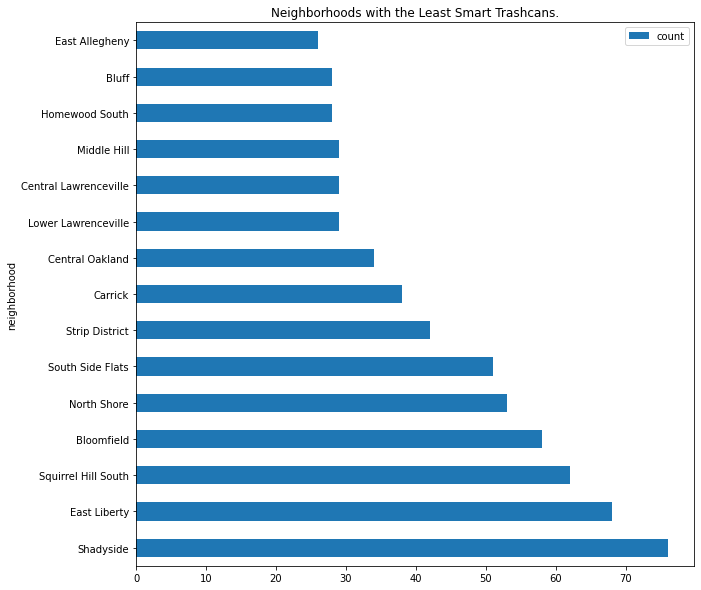

In [123]:
# places and relevant places
trashcans = pd.read_csv("trashcans.csv", usecols=['container_id', 'neighborhood'], dtype=str)

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = trashcans.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=False)

# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_top_trash_counts.csv', index=False)
ax = neighborhood_counts.head(15).plot.barh(x='neighborhood', y='count', figsize=(10, 10,), title='Neighborhoods with the Least Smart Trashcans.')

#### So we can see that from plotting the 15 

#### so a huge challenge was that it kept NOT showing the neighborhoods for the latitude and longitude despite using Griffin's amaze snippets. and Gavin was like, let's search up a coordinate and see where it pops up, what if its in antarctica?? And we were like hahahhaa as if. and then we just swapped the points, and it finally works. so we actually look up the coordinates as the way they are in the dataset. and guess where it was.. ANTARCTICA. so i would say that was the most challenging part of the project. 

In [3]:
# csv version. not super helpful? because i cant use geopandas with this... BUT I COULD BE WRONG
neighborhoods = pd.read_csv("NeighborhoodGeoBounds.csv")
neighborhoods.head

#Separate columns– I only want census tracts and hood names and other possibly usable spatial data
neighborhoods_ctracts = pd.DataFrame(columns=["CensusTracts", "GeoIds", "Neighborhoods","shape_area", "shape_length"])
neighborhoods_ctracts["CensusTracts"] = neighborhoods["tractce10"]
neighborhoods_ctracts["GeoIds"] = neighborhoods["geoid10"]
neighborhoods_ctracts["Neighborhoods"] = neighborhoods["hood"]
neighborhoods_ctracts["shape_area"] = neighborhoods["shape_area"]
neighborhoods_ctracts["shape_length"] = neighborhoods["shape_length"]
neighborhoods_ctracts.head()

,CensusTracts,GeoIds,Neighborhoods,shape_area,shape_length
0,140500,420031405003,Point Breeze North,8.417066e+06,14181.728231
1,140100,420031401003,Squirrel Hill North,3.410838e+07,30326.729782
2,101700,420031017002,Garfield,1.275115e+07,14577.426320
3,050900,420030509001,Bedford Dwellings,4.897512e+06,13941.514212
4,300100,420033001005,Knoxville,8.353056e+06,12021.864889


# Asbestos Permits Analysis

## By: Amy Zhang

##### Dataset: [Asbestos Permit Data](https://data.wprdc.org/dataset/allegheny-county-asbestos-permit/resource/0a5408a4-8358-4b14-9317-090db7c61fd9)

In [69]:
# Load in asbestos permits dataset
asbestos = pd.read_csv("Asbestos.csv")
asbestos.head()

#Narrow it down to only active ones (status column is active)
asbestos_active= asbestos[asbestos["status"]== "ACTIVE"]
#count = len(newAsbestos)
#print(row_count)
asbestos_active.head()

,_id,permit_number,s_name,s_address,city,z_code,p_fee,pa_license_no,contractor_name,permit_specifications,...,i_date,e_date,achd_inspector,job_complete,is_permit_date_extended,permit_o_e_date,project_type,status,latitude,longitude
915,1878800,PAA232002,DUQUESNE LIGHT COMPANY- 2825 NEW BEAVER AVE,NaN,PITTSBURGH,15233,850.0,918.0,DUQUESNE LIGHT COMPANY,REMOVE ARC-PROOF TAPE/PROOFING CEMENT IN VARIO...,...,2023-01-01,2023-12-31,CALI FEENEY,f,f,2023-12-31,PAA,ACTIVE,40.463914,-80.045183
1079,1878964,PAA234088,MUNICIPALITY REGULATED PROPERTY,320 COLLINS DRIVE,PITTSBURGH,15235,350.0,902.0,"AMERICAN CONTRACTING ENTERPRISES, INC.",REMOVE ASBESTOS CONTAINING DEBRIS THROUGHOUT S...,...,2023-01-23,2023-12-31,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.465340,-79.812024
1193,1879078,PAA234055,CITY OF MCKEESPORT REGULATED PROPERTY,910 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347608,-79.848797
1194,1879079,PAA234074,CITY OF MCKEESPORT REGULATED PROPERTY,705 VERNER ALLEY,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.349502,-79.856440
1241,1879126,PAA234054,CITY OF MCKEESPORT REGULATED PROPERTY,908 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347678,-79.848843


In [91]:
newAsbestos = pd.DataFrame(columns=['permit number', 'lat', 'long', 'neighborhood'])
newAsbestos = newAsbestos.astype({
    "permit number": str,
    "lat": float,
    "long": float,
    "neighborhood": str
})

# Assuming 'asbestos_active' DataFrame exists
newAsbestos["permit number"] = asbestos_active["permit_number"]
newAsbestos["lat"] = asbestos_active["latitude"]
newAsbestos["long"] = asbestos_active["longitude"]

newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,NaN
1079,PAA234088,40.465340,-79.812024,NaN
1193,PAA234055,40.347608,-79.848797,NaN
1194,PAA234074,40.349502,-79.856440,NaN
1241,PAA234054,40.347678,-79.848843,NaN


In [103]:
# Use fpsnippets to get permits sorted into neighborhoods, fill neighborhood columns with names
for index, row in newAsbestos.iterrows():
    latit = row["lat"]
    longi= row["long"]
    neighborhood_name= fpsnippets.geo_to_neighborhood(latit,longi)
    newAsbestos.loc[index, 'neighborhood'] = neighborhood_name
newAsbestos.head(20)

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
1079,PAA234088,40.465340,-79.812024,None
1193,PAA234055,40.347608,-79.848797,None
1194,PAA234074,40.349502,-79.856440,None
1241,PAA234054,40.347678,-79.848843,None
1242,PAA234059,40.346880,-79.848437,None
1261,PAA234060,40.346362,-79.848383,None
1271,PAA234066,40.341071,-79.849485,None
1475,PAA234075,40.348036,-79.853904,None
1578,DEM220308,40.493368,-79.783177,None


In [107]:
# Exclude none neighborhoods
neighborhood_notNone_mask = (newAsbestos['neighborhood'].notnull())

# Apply the mask to filter the DataFrame
filtered_newAsbestos = newAsbestos[neighborhood_notNone_mask]

# Display the filtered DataFrame
filtered_newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
2885,PAA220604,40.442581,-79.961792,West Oakland
4487,PAA230027,40.442247,-79.960929,West Oakland
5459,PAA224562,40.470131,-80.026204,Marshall-Shadeland
5507,PAA220599,40.444310,-79.953197,North Oakland


In [111]:
# change into a csv
filtered_newAsbestos.to_csv("filtered_newAsbestos.csv", sep=',', index= False, encoding = 'utf-8')

In [112]:
# count the stuff
filtered_newAsbestos['neighborhood'].value_counts()

Central Business District    24
Homewood North               15
North Oakland                12
West Oakland                 11
Squirrel Hill North           7
Marshall-Shadeland            6
Spring Garden                 6
Central Oakland               6
Bluff                         5
Perry North                   5
Shadyside                     4
Perry South                   4
South Side Flats              4
Bloomfield                    4
East Hills                    3
Squirrel Hill South           3
Central Northside             3
Lincoln-Lemington-Belmar      3
Fineview                      2
Beechview                     2
Sheraden                      2
Knoxville                     2
Allegheny Center              2
Brighton Heights              2
Elliott                       2
Chateau                       2
Fairywood                     2
Homewood South                1
Hazelwood                     1
Spring Hill-City View         1
Overbrook                     1
Westwood

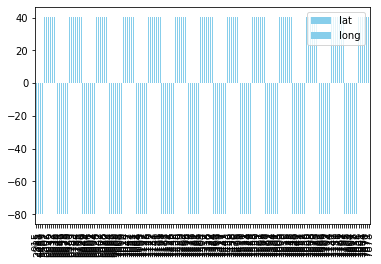

In [115]:
filtered_newAsbestos.plot(kind='bar', color='skyblue')

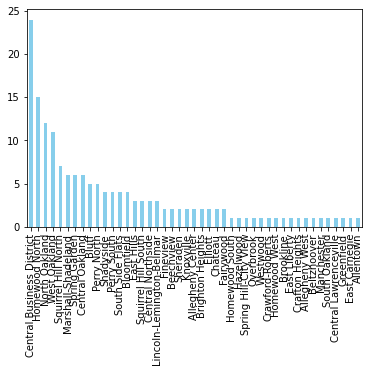

In [116]:
# oh thats not...

# plot the count
counts = filtered_newAsbestos['neighborhood'].value_counts()
counts.plot(kind='bar', color='skyblue')

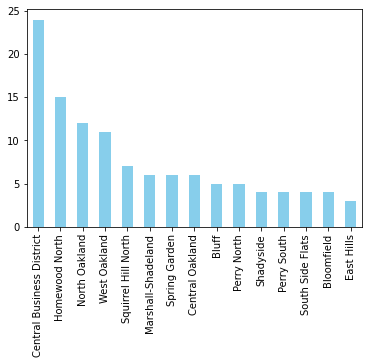

In [118]:
# only do the top 15
counts.head(15).plot(kind='bar', color='skyblue')
